In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
price_car = pd.read_csv("Car_Purchasing_Data.csv", encoding="ISO-8859-1")

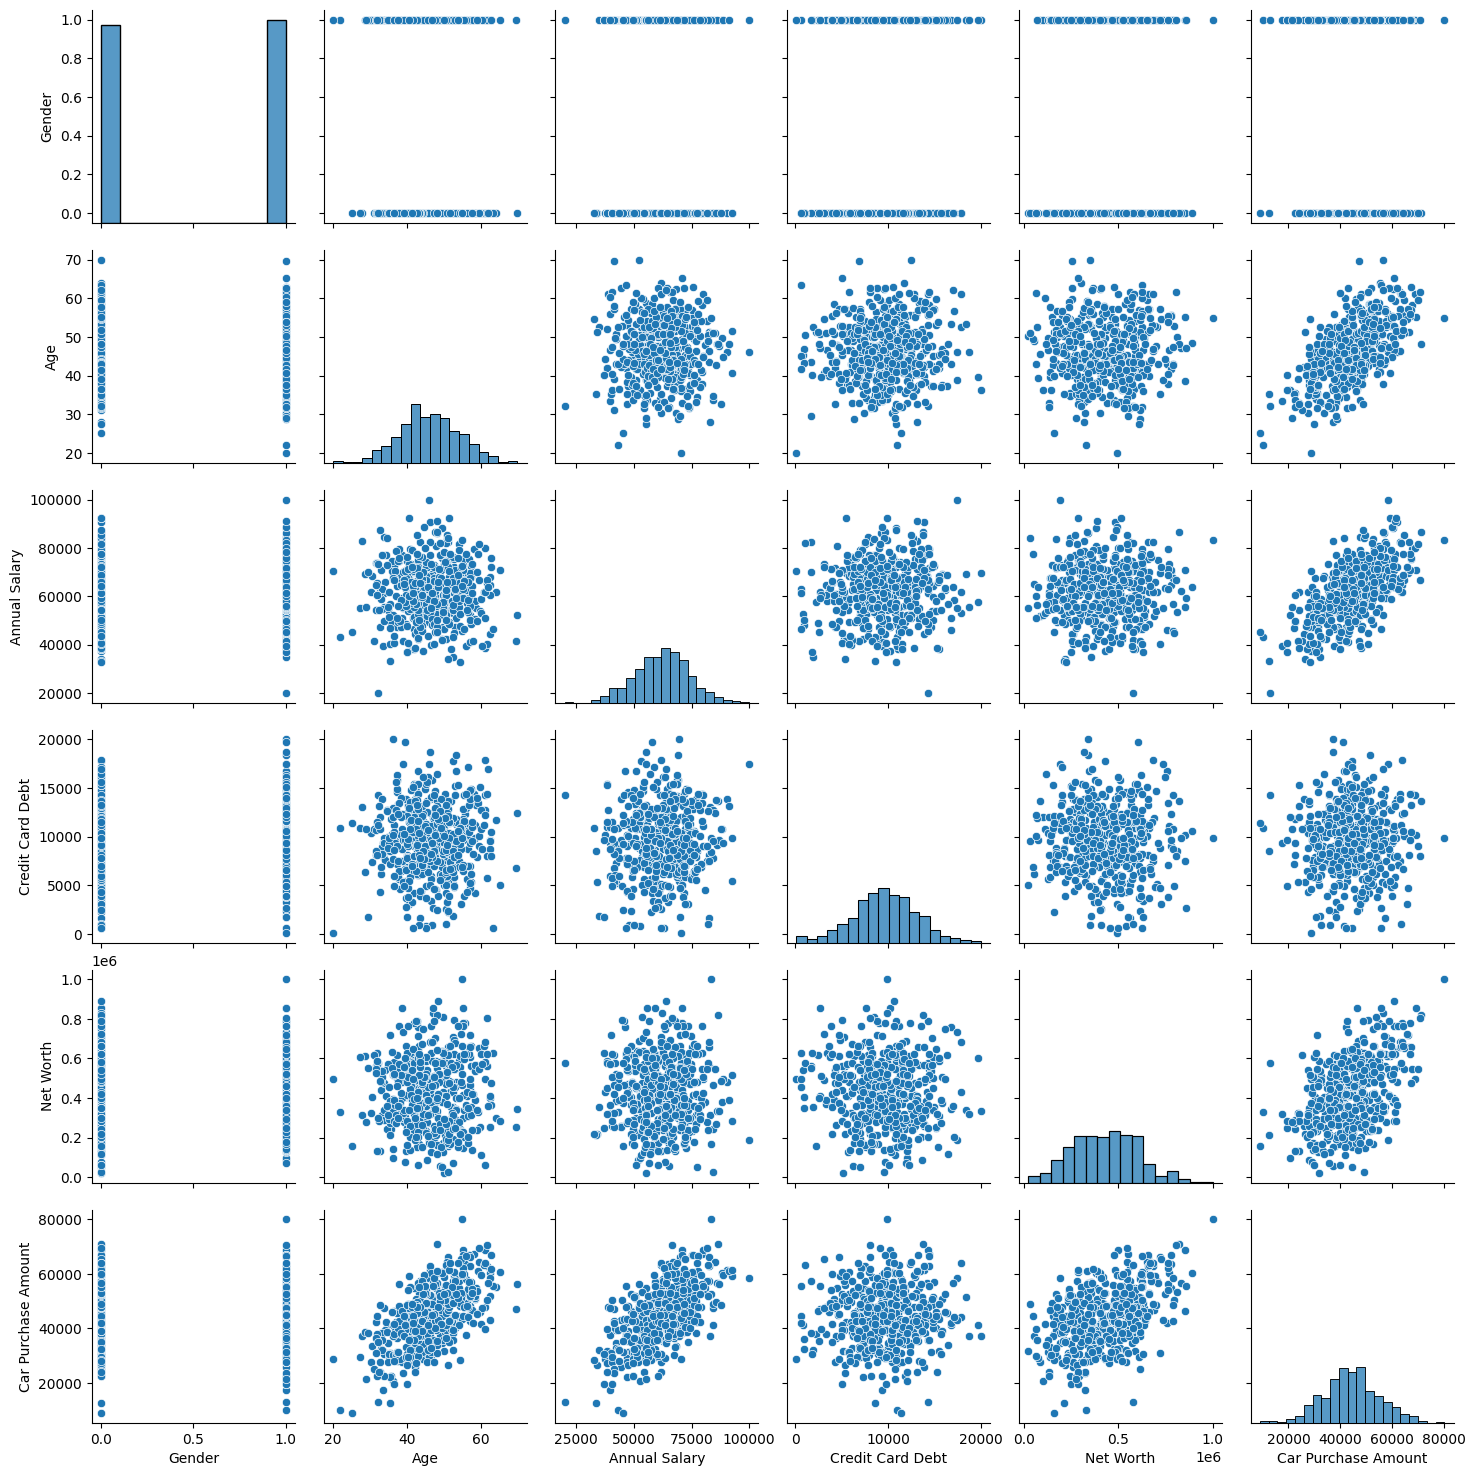

In [ ]:
sns.pairplot(price_car)

In [ ]:
price_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [ ]:
import numpy as np
from  sklearn.neighbors  import  LocalOutlierFactor
for label, value in price_car.items():
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.impute import SimpleImputer
    mi=MinMaxScaler()
    lo=LocalOutlierFactor()
    si=SimpleImputer(strategy='constant')
    if pd.api.types.is_numeric_dtype(value):
        mi.fit(np.reshape(price_car[label],[-1,1]))
        price_car[label]=mi.transform(np.reshape(price_car[label],[-1,1]))
        if pd.isnull(value).sum():
           si.fit(np.reshape(price_car[label],[-1,1]))
           price_car[label]=si.transform(np.reshape(price_car[label],[-1,1]))

mask=lo.fit_predict(price_car[ [i for i in price_car.columns if pd.api.types.is_numeric_dtype(price_car[i])]])

In [ ]:
mask=mask!=-1
price_car=price_car[mask]

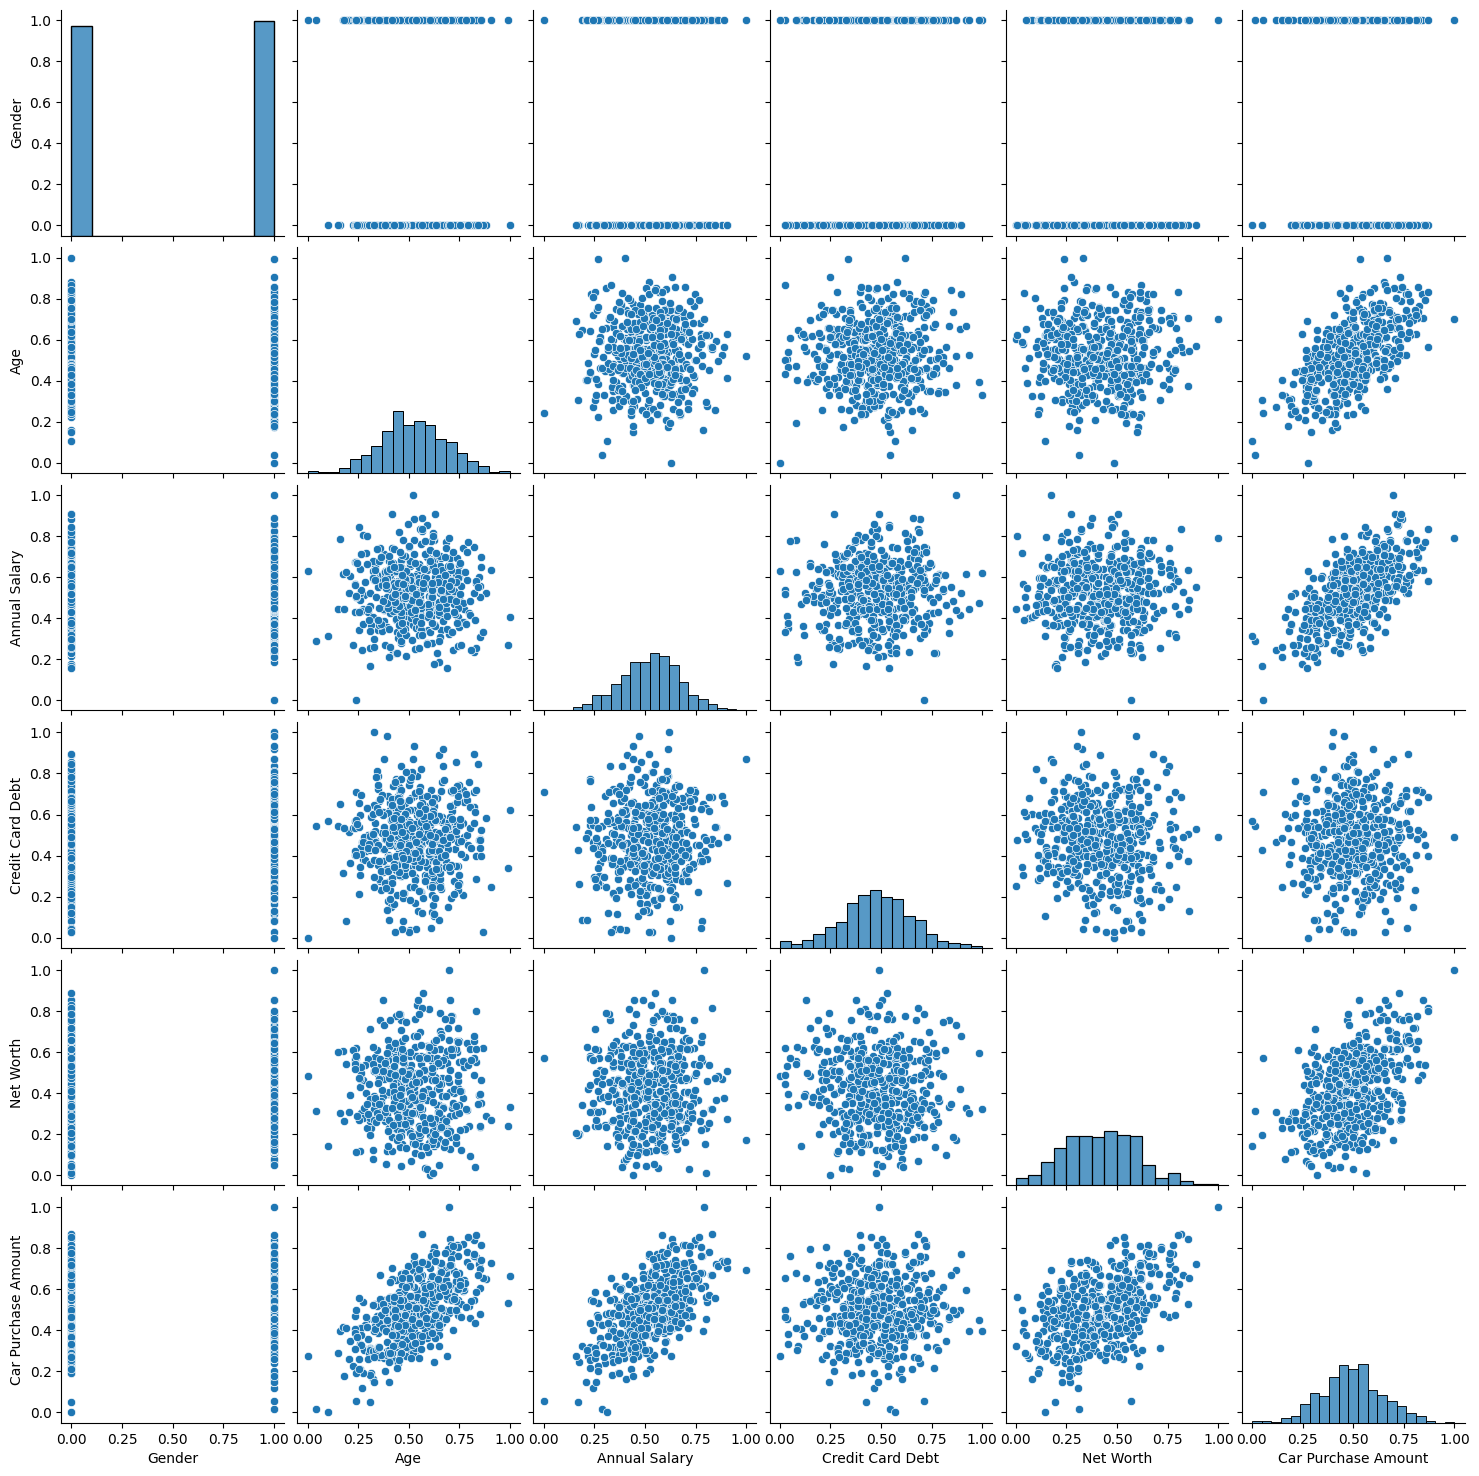

In [ ]:
sns.pairplot(price_car)

In [ ]:
y = price_car["Car Purchase Amount"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for label,value in price_car.items():
  if pd.api.types.is_object_dtype(value):
     le.fit(price_car[label])

     price_car[label]=le.transform(price_car[label])

In [ ]:
price_car.drop(columns=['Customer Name','Customer e-mail'],inplace=True)

In [ ]:
price_car

,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,27,0.0,0.437034,0.535151,0.578361,0.223430,0.370725
1,17,0.0,0.417412,0.583086,0.476028,0.521402,0.508669
2,1,1.0,0.463058,0.422482,0.555797,0.631089,0.477827
3,41,1.0,0.765427,0.742125,0.719908,0.539387,0.822850
4,26,1.0,0.746275,0.496614,0.264257,0.551331,0.660781
...,...,...,...,...,...,...,...
495,128,0.0,0.429250,0.649280,0.346528,0.532316,0.561992
496,208,1.0,0.352840,0.450494,0.613139,0.347366,0.316780
497,144,1.0,0.678870,0.611110,0.528221,0.759726,0.776722
498,24,1.0,0.783210,0.372650,0.699147,0.324313,0.513270


In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim = 6, activation = "relu"))#fully connected, 40  neurons on hidden layer
model.add(Dense(40, activation = "relu"))#additional hidden layer
model.add(Dense(1, activation="linear"))#specify output

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 10)                  │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 40)                  │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 551 (2.15 KB)

 Trainable params: 551 (2.15 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss = "mean_squared_error")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(price_car.drop(columns=["Car Purchase Amount"]), y, test_size=0.25)

In [ ]:
epochs= model.fit(X_train, y_train, epochs=70, batch_size=10,  verbose=1, validation_split=0.25)

Epoch 1/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - val_loss: 0.0060
Epoch 2/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - val_loss: 0.0107
Epoch 3/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - val_loss: 0.0072
Epoch 4/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - val_loss: 0.0069
Epoch 5/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - val_loss: 0.0052
Epoch 6/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0050 - val_loss: 0.0060
Epoch 7/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 - val_loss: 0.0090
Epoch 8/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074 - val_loss: 0.0057
Epoch 9/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0064 - val_loss: 0.0055
Epoch 10/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 11/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - val_loss: 0.0049
Epoch 12/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - val_lo

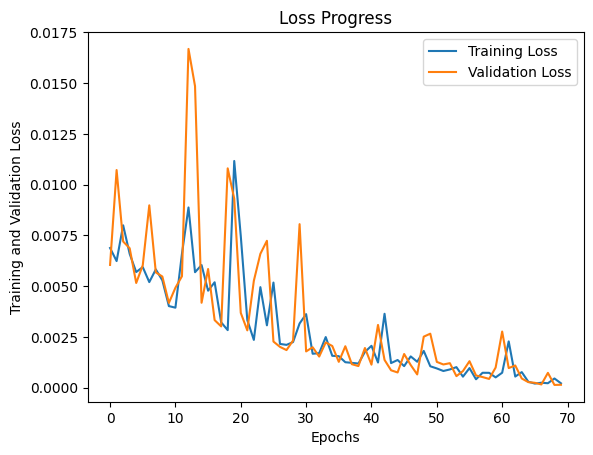

In [ ]:
plt.plot(epochs.history["loss"])
plt.plot(epochs.history["val_loss"])
plt.title("Loss Progress")
plt.ylabel("Training and Validation Loss")
plt.xlabel("Epochs")
plt.legend(["Training Loss", "Validation Loss"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(price_car.drop(columns=["Car Purchase Amount"]), y, test_size=0.25)

In [ ]:
model.compile(optimizer='adam',loss = "mean_squared_error")
epochs= model.fit(X_train, y_train, epochs=50, batch_size=50,  verbose=1, validation_split=0.25,callbacks=[early_stopping])

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2614 - val_loss: 0.0977
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0876 - val_loss: 0.0340
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0325 - val_loss: 0.0219
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0234 - val_loss: 0.0184
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0161 - val_loss: 0.0067
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - val_loss: 0.0065
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - val_loss: 0.0011
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - val_loss: 6.4172e-04
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.0617e-04 - val_loss: 4.0118e-04

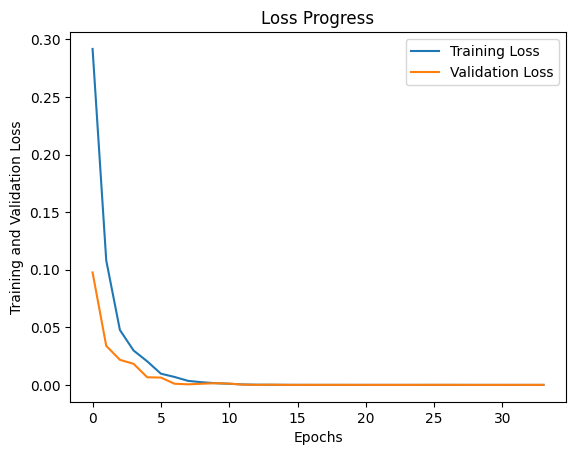

In [ ]:
plt.plot(epochs.history["loss"])
plt.plot(epochs.history["val_loss"])
plt.title("Loss Progress")
plt.ylabel("Training and Validation Loss")
plt.xlabel("Epochs")
plt.legend(["Training Loss", "Validation Loss"])

In [ ]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))


In [ ]:
rmsle(y_test, model.predict(X_test))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


0.008382093874907274